In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
#mport pydotplus
#import graphviz
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score


D:\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [4]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)


In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [10]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [12]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [13]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


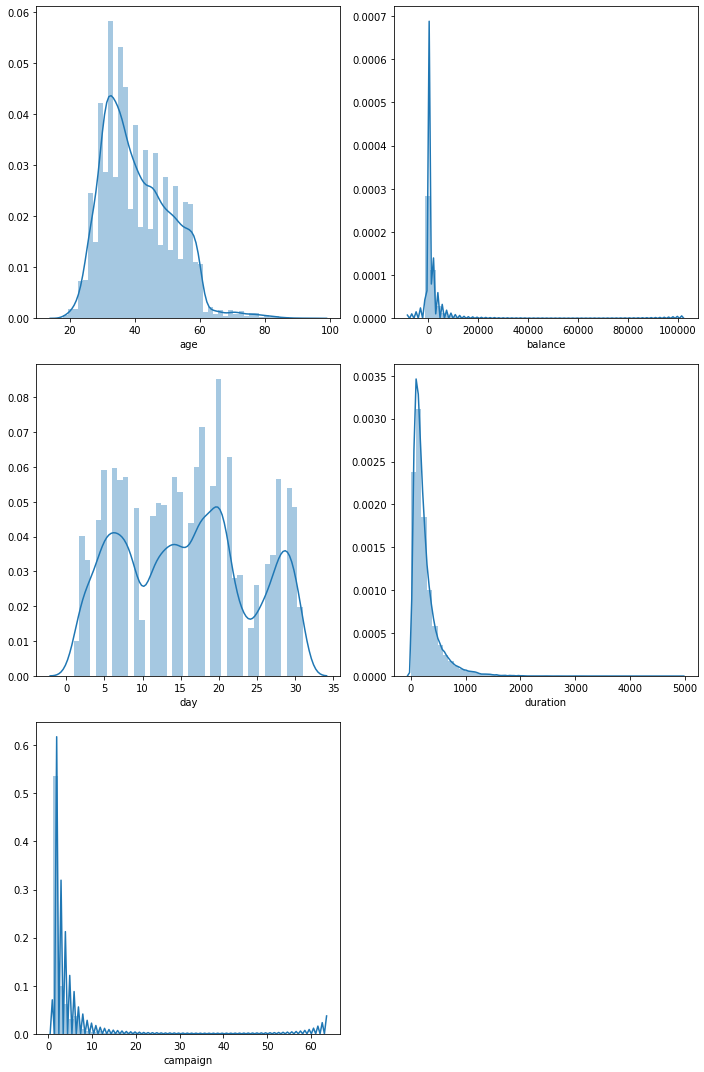

In [15]:
fig, axe = plt.subplots(nrows=3, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 
sns.distplot(data['age'],ax=axe[0]) 
sns.distplot(data['balance'],ax=axe[1]) 
sns.distplot(data['day'],ax=axe[2]) 
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
fig.tight_layout() 
fig.show()
axe.flat[-1].set_visible(False)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


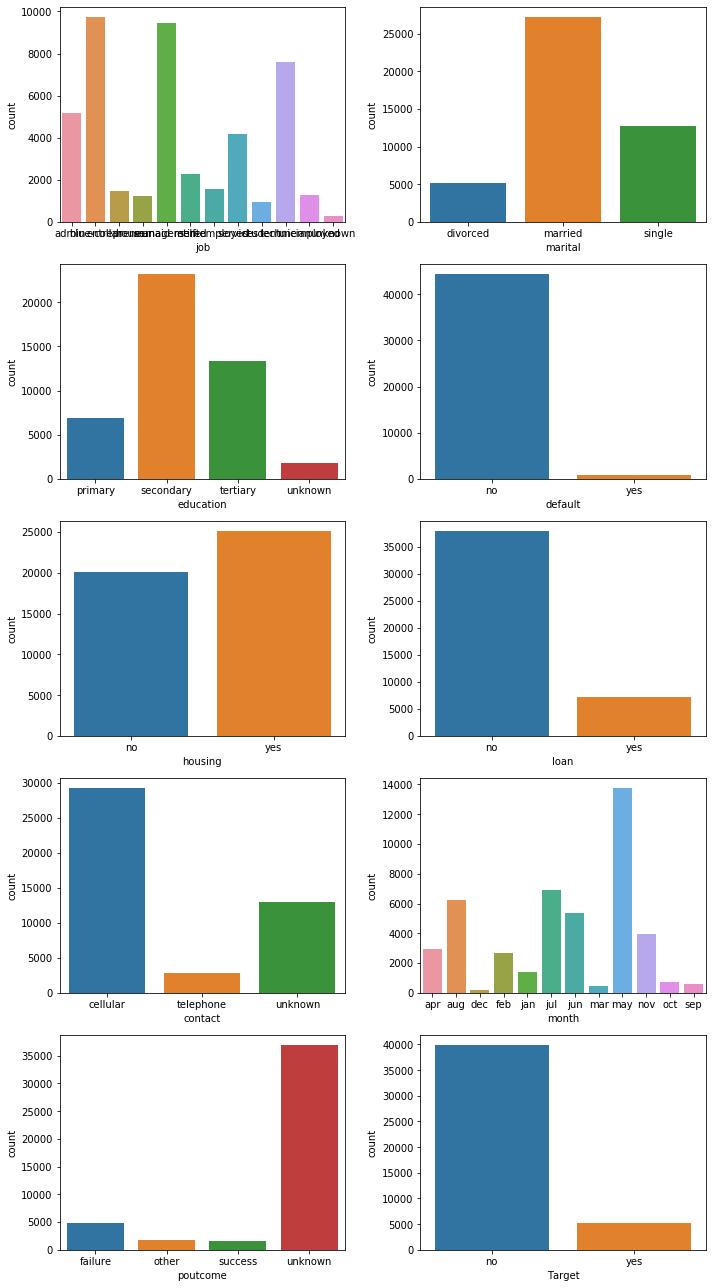

In [16]:
fig,axe = plt.subplots(nrows=5,ncols=2,figsize=(10,18))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
#plt.set(plt.get_(),rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])
sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])
fig.tight_layout() #for arranging the plots
fig.show() #display plots



In [17]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [18]:
df=data.copy()
encoder=LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)



In [19]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [20]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [22]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])

In [23]:
meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

In [24]:
meancam=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])

In [25]:
meanpd=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd,df['pdays'])

In [26]:
meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanbal,df['previous'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


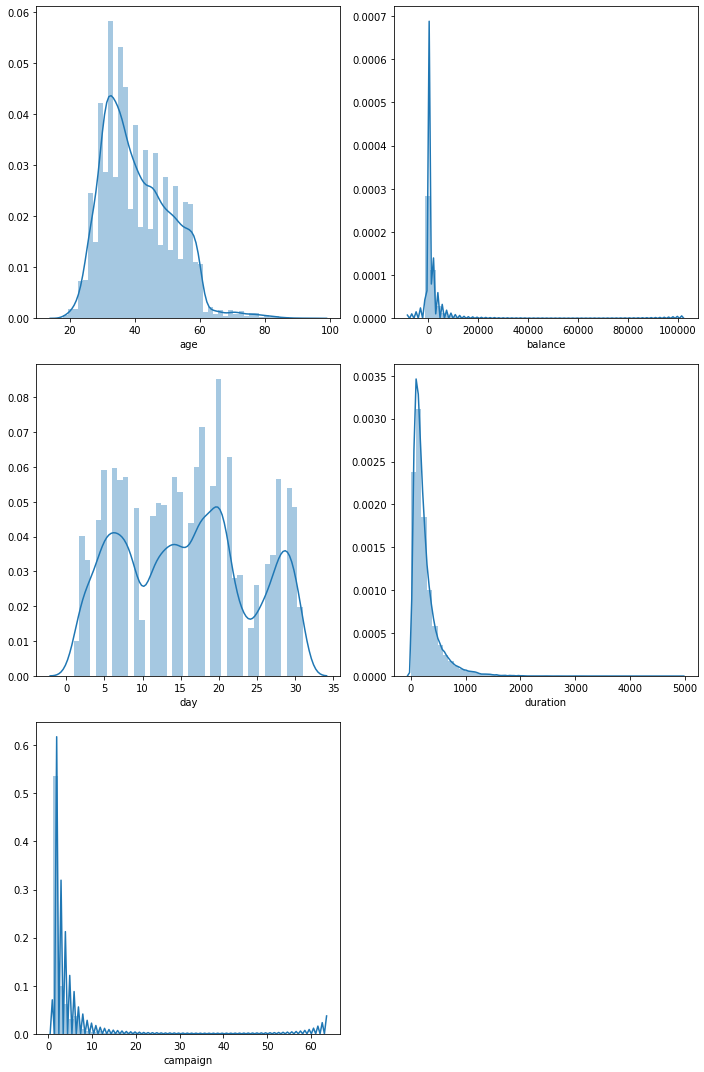

In [27]:
fig, axe = plt.subplots(nrows=3, ncols=2, figsize=(10, 15)) 
axe = axe.flatten() 
sns.distplot(data['age'],ax=axe[0]) 
sns.distplot(data['balance'],ax=axe[1]) 
sns.distplot(data['day'],ax=axe[2]) 
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
fig.tight_layout() 
fig.show()
axe.flat[-1].set_visible(False)

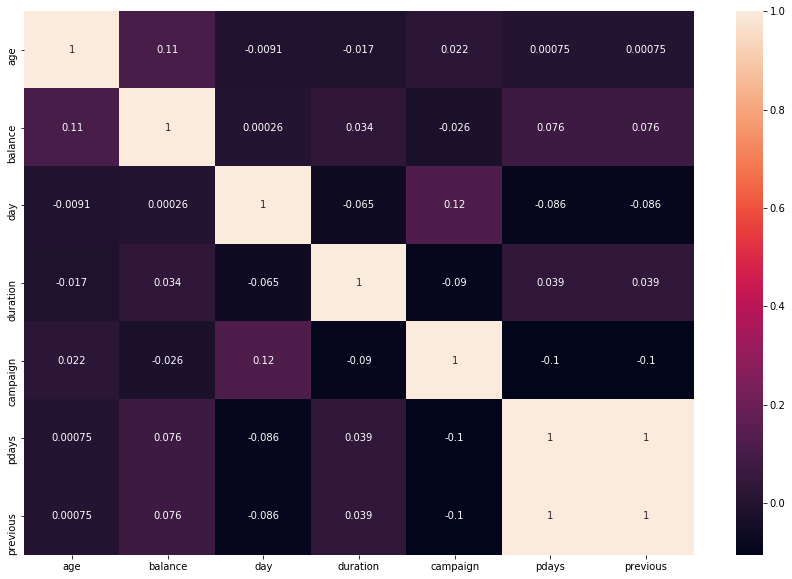

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

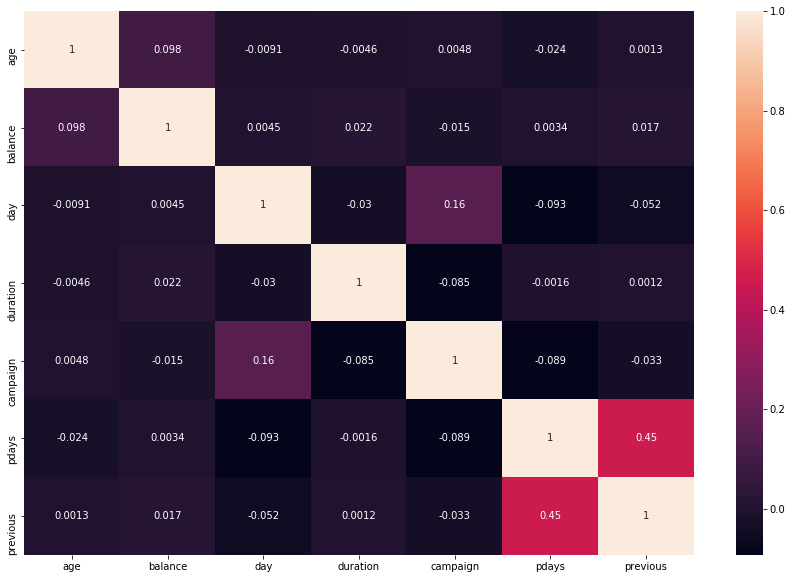

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [30]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [31]:
df2=df.drop(['job','education','duration','pdays','day','month','contact'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


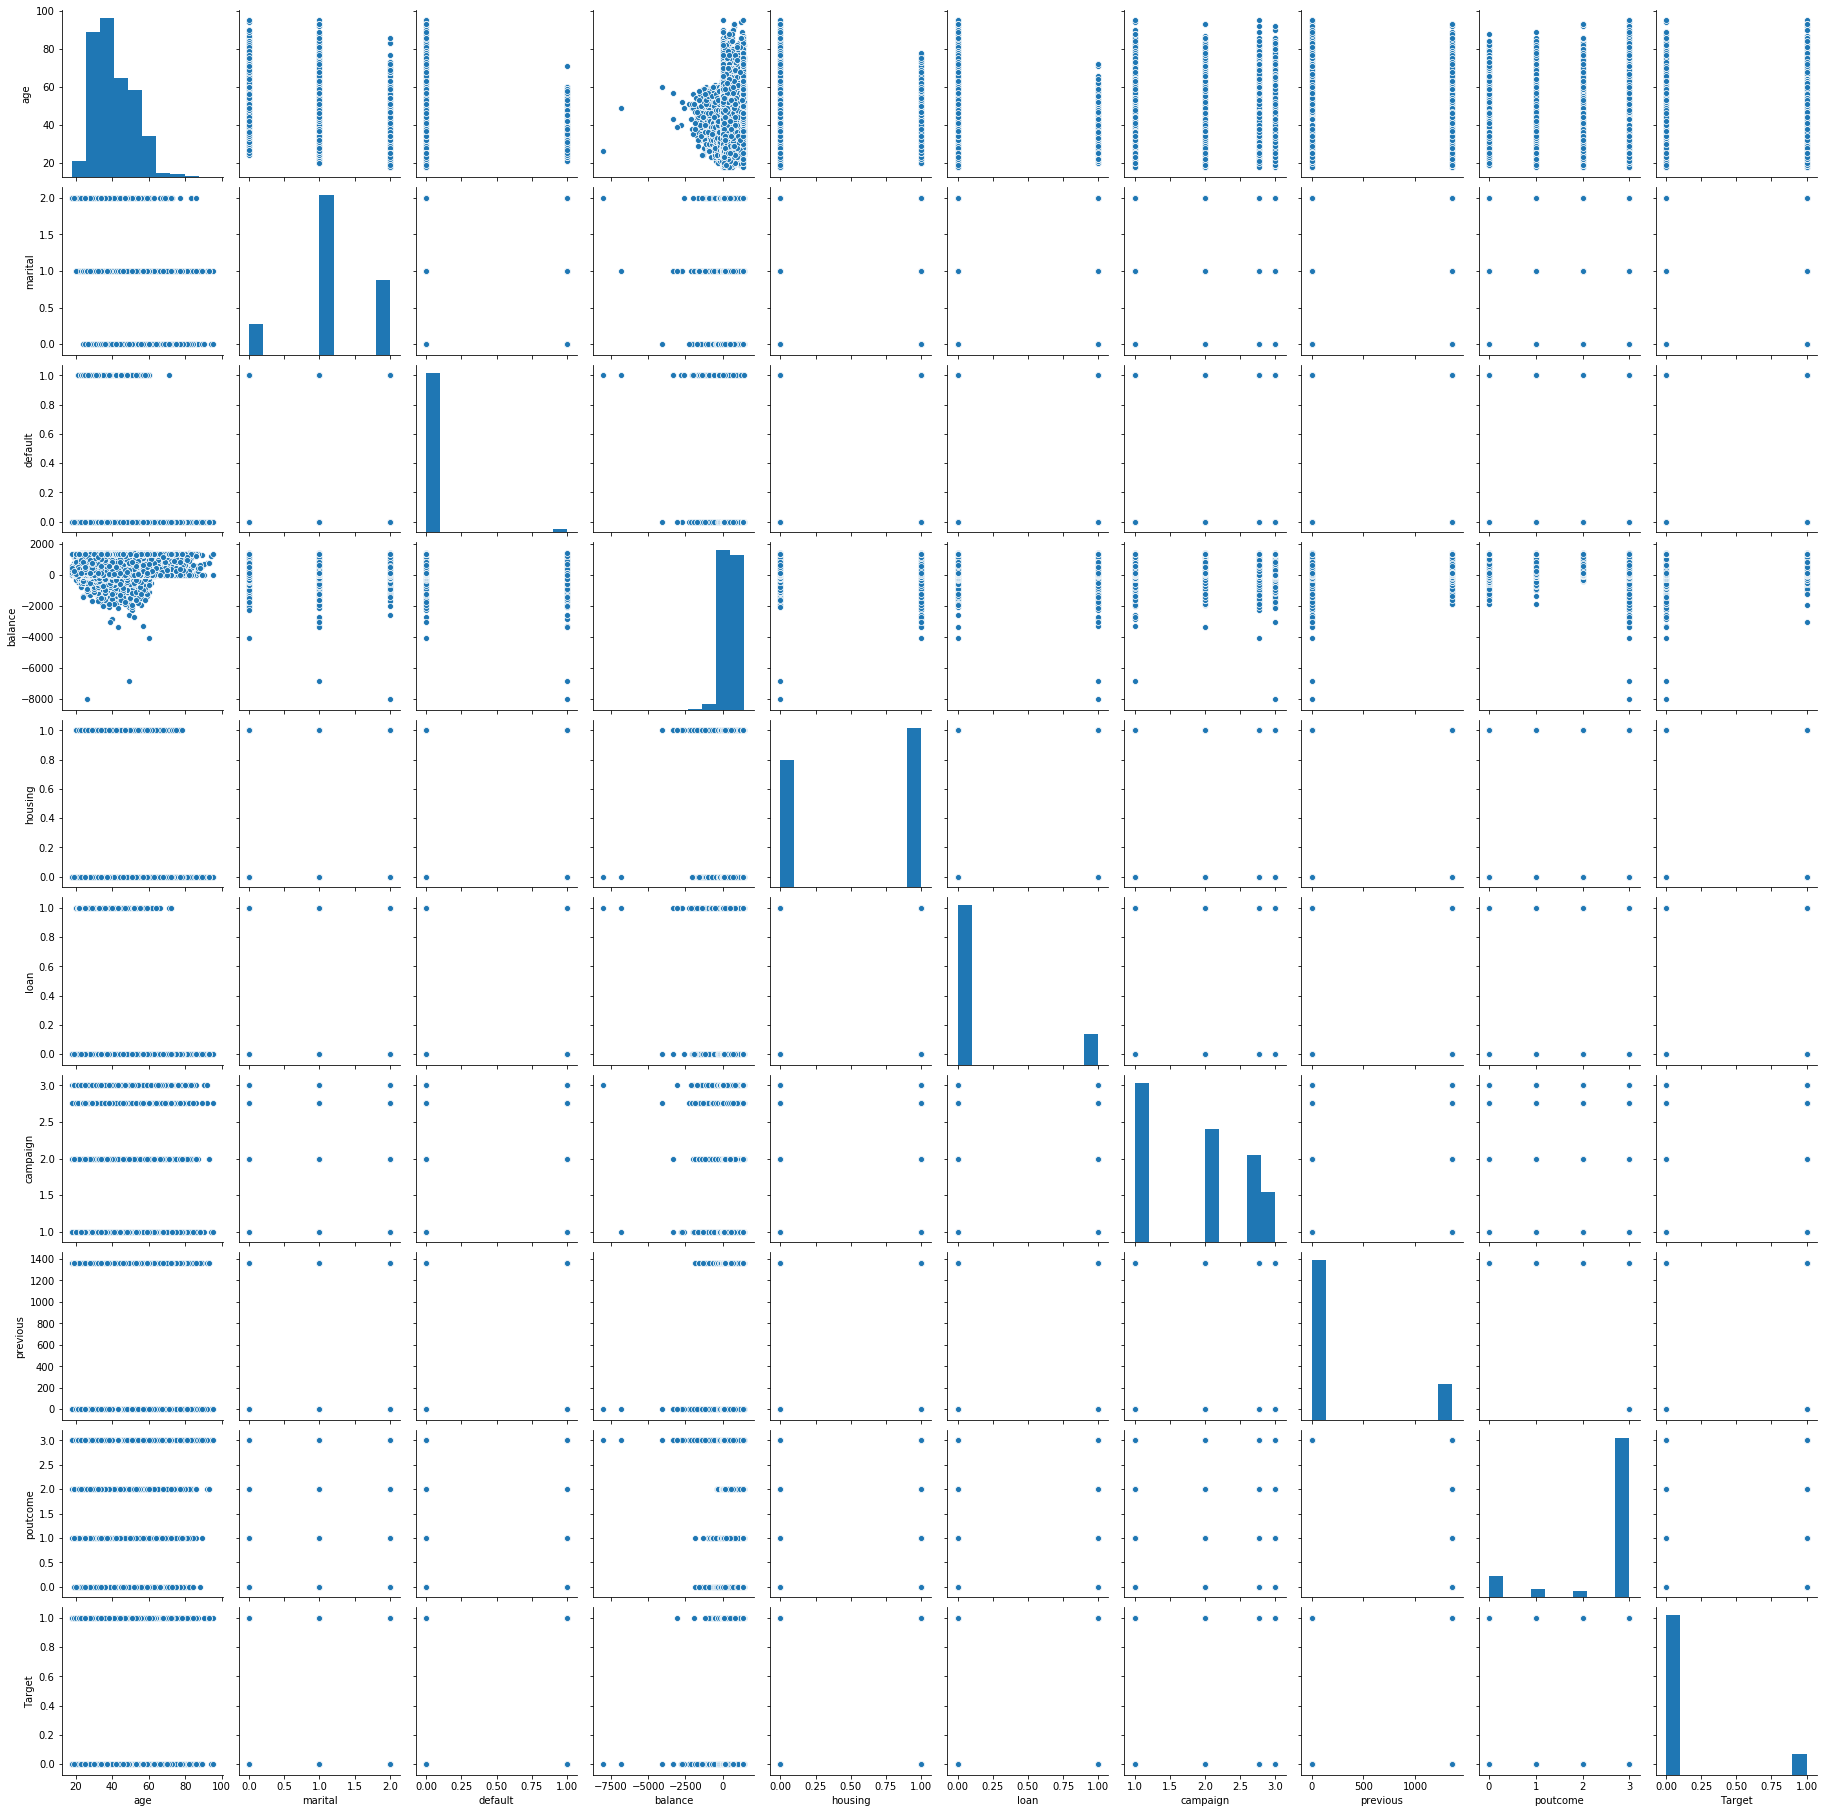

In [46]:
sns.pairplot(df2)

In [32]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [34]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

In [35]:
#logistic Regression
logic_r=LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled,ytrain)
y_pred=logic_r.predict(xtest_scaled)
LR_accuracy = accuracy_score(ytest,y_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,y_pred))
print('\n Accuray scoren', LR_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,y_pred))


Confusion matrix

 [[11892   107]
 [ 1318   247]]

 Accuray scoren 89.49424948392804

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [39]:
#Naive bayes
NB=GaussianNB()
NB.fit(xtrain_scaled,ytrain)
y_predi=NB.predict(xtest_scaled)
NB_accuracy=accuracy_score(ytest,y_predi)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,y_pred))
print('\n Accuray score',NB_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,y_pred))


Confusion matrix

 [[11892   107]
 [ 1318   247]]

 Accuray score 82.40194632851666

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [40]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled,ytrain)
y_predict=knn.predict(xtest_scaled)

knn_accuracy=accuracy_score(ytest,y_predict)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,y_predict))
print('\n Accuray score',knn_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,y_predict))


Confusion matrix

 [[11465   534]
 [ 1236   329]]

 Accuray score 86.95075199056326

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



In [43]:
#SVC
svc=SVC()
svc.fit(xtrain_scaled,ytrain)
y_pred1=svc.predict(xtest_scaled)
svc_accuracy =accuracy_score(ytest,y_pred1)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,y_pred1))
print('\n Accuray score',svc_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,y_pred1))


Confusion matrix

 [[11856   143]
 [ 1287   278]]

 Accuray score 89.45738720141551

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [51]:
#decision Tree
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)
DT_accuracy=accuracy_score(ytest,dt_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,y_pred))
print('\n Accuray score',DT_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,y_pred))



Confusion matrix

 [[11892   107]
 [ 1318   247]]

 Accuray score 82.57888528457681

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [57]:
#bagging Ensemble Model
bagc = BaggingClassifier(base_estimator=dtree, n_estimators=500,random_state=1)
bagc.fit(xtrain_scaled,ytrain)
bag_pred=bagc.predict(xtest_scaled)

BAG_accuracy=accuracy_score(ytest,bag_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,bag_pred))
print('\n Accuray score',BAG_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,bag_pred))



Confusion matrix

 [[11549   450]
 [ 1231   334]]

 Accuray score 87.60690061928635

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [62]:
adab= AdaBoostClassifier(n_estimators=50,random_state=1)
adab.fit(xtrain,ytrain)
adab_pred=adab.predict(xtest)

ADAB_accuracy=accuracy_score(ytest,ada_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,adab_pred))
print('\n Accuray score',ADAB_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,adab_pred))



Confusion matrix

 [[11886   113]
 [ 1324   241]]

 Accuray score 89.40578000589797

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.68      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [65]:
#RandomForest Ensemble Model
randf=RandomForestClassifier(n_estimators=100,random_state=2,max_features=3)
randf.fit(xtrain,ytrain)
ran_pred=randf.predict(xtest)

RAN_accuracy= accuracy_score(ytest,ran_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,ran_pred))
print('\n Accuray score',RAN_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,ran_pred))



Confusion matrix

 [[11536   463]
 [ 1226   339]]

 Accuray score 87.5479209672663

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [89]:
#Gradient Boosting
grad=GradientBoostingClassifier(n_estimators=100,random_state=2)
grad.fit(xtrain,ytrain)
grad_pred=grad.predict(xtest)
GRAD_accuracy=accuracy_score(ytest,grad_pred)
print('\nConfusion matrix\n\n',confusion_matrix(ytest,grad_pred))
print('\n Accuray score',BAG_accuracy*100)
print('\n Classification Report \n\n',classification_report(ytest,grad_pred))



Confusion matrix

 [[11900    99]
 [ 1328   237]]

 Accuray score 87.60690061928635

 Classification Report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



In [90]:
scores=[('Naive Bayes',NB_accuracy),('KNN',knn_accuracy),
        ('Logistic Reg',LR_accuracy),('SVC',Svc_accuracy),
        ('Desicion Tree',DT_accuracy),('Bagging',BAG_accuracy),
        ('Adaptive Boosting',ADAB_accuracy),('Gradient Boosting',GRAD_accuracy)
        ,('Random forest',RAN_accuracy) ]

scores=pd.DataFrame(scores,columns=['Model','Accuracy Score'])

print('\033[lm''Current Scores with Outliersreplaced with mean:]')
scores.sort_values(by='Accuracy Score',ascending=False)

mCurrent Scores with Outliersreplaced with mean:]


,Model,Accuracy Score
2,Logistic Reg,0.894942
7,Gradient Boosting,0.894795
3,SVC,0.894574
6,Adaptive Boosting,0.894058
5,Bagging,0.876069
8,Random forest,0.875479
1,KNN,0.869508
4,Desicion Tree,0.825789
0,Naive Bayes,0.824019


the Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.